In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.manifold import TSNE
from train_lstm import BASE_DATA_DIR, QNA_DATA_DIR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
def plot_student_history(embeddings_path, user_id):
    embeddings = torch.load(embeddings_path)

    df = pd.read_pickle(f"{QNA_DATA_DIR}/all_data_qna_expanded.pkl")
    user_df = df[df["user_id"] == user_id].sort_values("start_time")

    tsne = TSNE(n_components=2, random_state=0, n_jobs=-1)
    X_2d = tsne.fit_transform(embeddings)

    colors = np.array([sns.color_palette("Paired")[0]] * len(embeddings))
    colors[user_df.index] = list(map(lambda x: (x[0], x[1], x[2]), sns.color_palette("flare", as_cmap=True)(np.linspace(0, 1, len(user_df)))))
    
    # indices not in user_df
    other_indices = np.setdiff1d(np.arange(len(embeddings)), user_df.index)

    plt.scatter(X_2d[other_indices, 0], X_2d[other_indices, 1], c=colors[other_indices])
    plt.scatter(X_2d[user_df.index, 0], X_2d[user_df.index, 1], c=colors[user_df.index])
    cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))
    cbar.ax.set_yticks([0, 1], ["old", "recent"], va="center")
    cbar.ax.set_ylabel("Time", rotation=270, va="center")
    plt.show()

    return X_2d, colors

# Construct sequences

### Plot user history

In [3]:
users = [394913, 414189] # chosen because they have 201 questions each
# users = [397178, 396605] # chosen because they have 51 questions each

In [4]:
BERT_EMBEDDINGS = [
    f"{BASE_DATA_DIR}/lernnavi/embeddings/bert_seq_len_10.pt"
]
MISTRAL_EMBEDDINGS = [
    f"{BASE_DATA_DIR}/lernnavi/embeddings/mistral_seq_len_{seq_len}.pt"
    for seq_len in [10, 20, 30, 40]
]
LSTM_EMBEDDINGS = [
    f"{BASE_DATA_DIR}/lernnavi/embeddings/lstm_seq_len_{seq_len}_h_dims_1.pt"
    for seq_len in [10, 20, 30, 40]
]
MLP_EMBEDDINGS = [
    f"{BASE_DATA_DIR}/lernnavi/embeddings/mlp_ae.pt"
]

/tmp/ipykernel_3944/2545334583.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


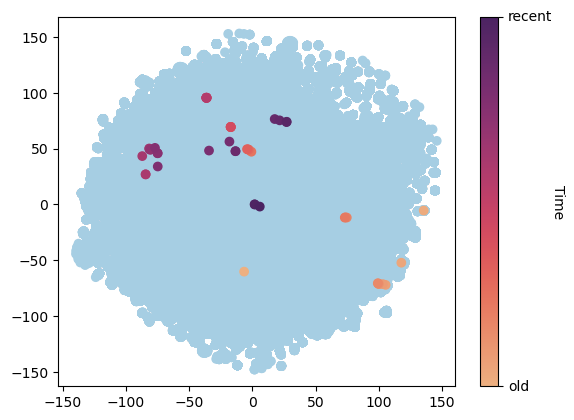

In [41]:
X_2d_bert_10, colors_bert_10 = plot_student_history(BERT_EMBEDDINGS[0], users[0])

In [61]:
df.groupby("user_id").count()["start_time"].sort_values(ascending=False).head(50)

user_id
395041    482
395046    461
393313    447
415758    421
393319    360
413365    332
396937    328
395039    327
394966    325
401331    320
394969    311
395036    306
414187    283
394967    263
393320    262
414162    257
393321    256
394960    255
400292    253
393308    243
393306    240
397197    240
394957    239
414193    239
414154    238
394956    237
394760    237
405782    231
395038    229
394988    227
394961    227
395045    226
390316    225
395049    224
394762    220
389844    220
398513    219
394743    216
395056    216
389968    215
398470    212
394780    212
413165    211
394987    211
405845    207
395043    206
389583    203
394769    203
413161    203
395047    202
Name: start_time, dtype: int64

/tmp/ipykernel_3944/3917759466.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


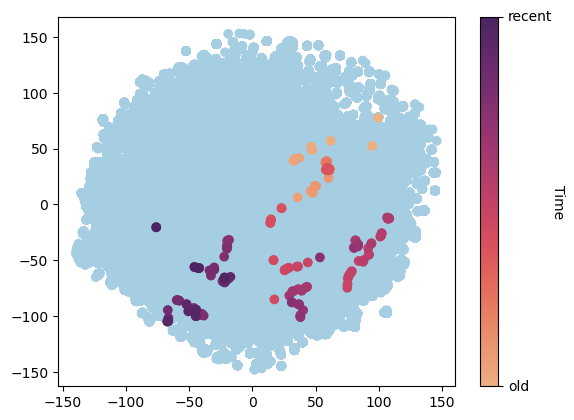

In [79]:
user_id = users[1]
user_id = 394762

df = pd.read_pickle(f"{QNA_DATA_DIR}/all_data_qna_expanded.pkl")
user_df = df[df["user_id"] == user_id].sort_values("start_time")

colors = np.array([sns.color_palette("Paired")[0]] * len(X_2d_bert_10))
colors[user_df.index] = list(map(lambda x: (x[0], x[1], x[2]), sns.color_palette("flare", as_cmap=True)(np.linspace(0, 1, len(user_df)))))

# indices not in user_df
other_indices = np.setdiff1d(np.arange(len(X_2d_bert_10)), user_df.index)

plt.scatter(X_2d_bert_10[other_indices, 0], X_2d_bert_10[other_indices, 1], c=colors[other_indices])
plt.scatter(X_2d_bert_10[user_df.index, 0], X_2d_bert_10[user_df.index, 1], c=colors[user_df.index])
cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))
cbar.ax.set_yticks([0, 1], ["old", "recent"], va="center")
cbar.ax.set_ylabel("Time", rotation=270, va="center")
plt.show()

/tmp/ipykernel_4583/2545334583.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


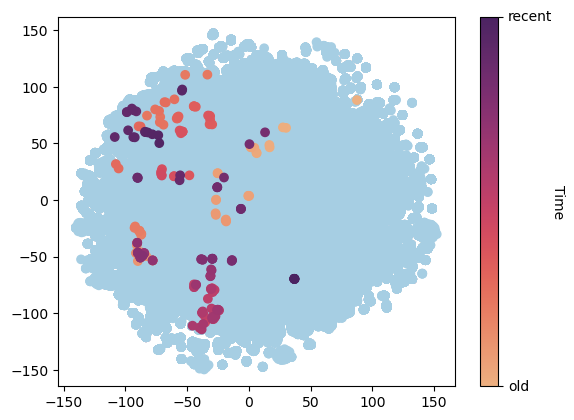

/tmp/ipykernel_4583/2545334583.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


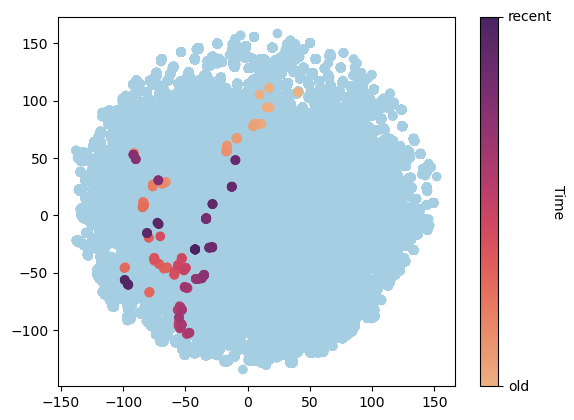

/tmp/ipykernel_4583/2545334583.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


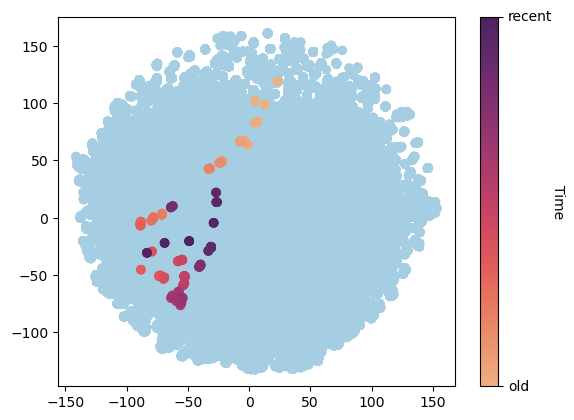

/tmp/ipykernel_4583/2545334583.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


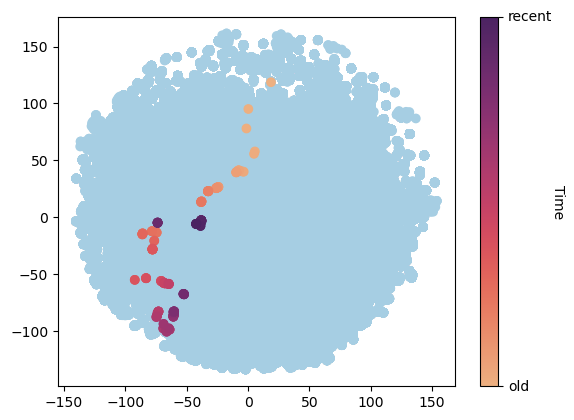

In [5]:
ASDF = [plot_student_history(x, users[0]) for x in MISTRAL_EMBEDDINGS]

/tmp/ipykernel_4583/3275499634.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


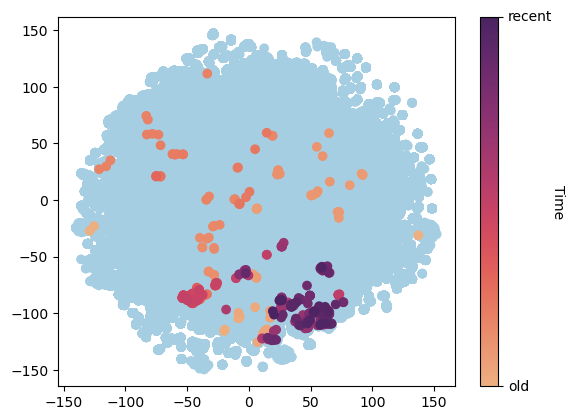

/tmp/ipykernel_4583/3275499634.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


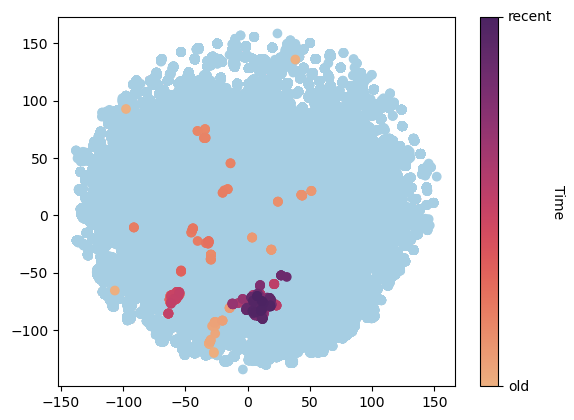

/tmp/ipykernel_4583/3275499634.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


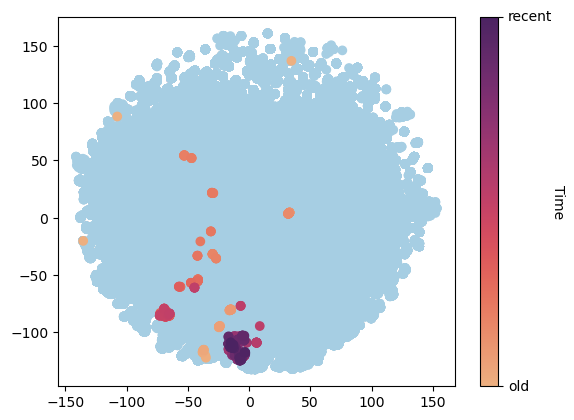

/tmp/ipykernel_4583/3275499634.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))


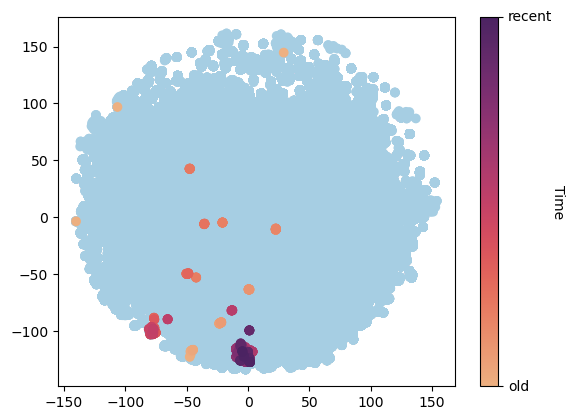

In [10]:
for y in ASDF:
    user_id = 395041
    df = pd.read_pickle(f"{QNA_DATA_DIR}/all_data_qna_expanded.pkl")
    user_df = df[df["user_id"] == user_id].sort_values("start_time")

    X_2d, colors = y


    colors = np.array([sns.color_palette("Paired")[0]] * len(X_2d))
    colors[user_df.index] = list(map(lambda x: (x[0], x[1], x[2]), sns.color_palette("flare", as_cmap=True)(np.linspace(0, 1, len(user_df)))))

    # indices not in user_df
    other_indices = np.setdiff1d(np.arange(len(X_2d)), user_df.index)

    plt.scatter(X_2d[other_indices, 0], X_2d[other_indices, 1], c=colors[other_indices])
    plt.scatter(X_2d[user_df.index, 0], X_2d[user_df.index, 1], c=colors[user_df.index])
    cbar = plt.colorbar(cm.ScalarMappable(cmap="flare"))
    cbar.ax.set_yticks([0, 1], ["old", "recent"], va="center")
    cbar.ax.set_ylabel("Time", rotation=270, va="center")
    plt.show()

# Other stuff

In [107]:
# create artificial sequences using questions and answers contained in the original dataset to evaluate the embedding quality
# create sequences of length 5
# create sequences of questions correct answers
# create sequences of questions wrong answers
# create sequences of questions with random answers
# create sequences of questions with random answers with the same topic

import random
import numpy as np
from tqdm import tqdm

questions_and_ground_truth = pd.read_pickle(f"{QNA_DATA_DIR}/questions_and_ground_truth.pkl")

def create_artificial_sequences(dataset, n=1000, seq_len=5, perc_correct=0.5, seed=42):
    sequences = [[] for _ in range(n)]
    for i in range(n):
        for j in range(seq_len):
            # select a random question
            question = pd.Series(dataset["question"].unique()).sample(1, random_state=seed).values[0]

            # select all answers for the question
            answers = dataset[dataset["question"] == question]

            if random.random() < perc_correct:
                # select correct answer
                answer = answers[answers["correct_answer"] == True].sample(1)
            else:
                # select wrong answer
                answer = answers[answers["correct_answer"] == False].sample(1)

            # add the question and the answer to the sequence
            sequences[i].append({"question": question, "choice": answer["choice"].values[0], "correct": answer["correct_answer"].values[0], "user_id": 0, "start_time": j})
    return list(map(pd.DataFrame, sequences))
            
artificial_sequences = [
    *create_artificial_sequences(questions_and_ground_truth, n=100, seq_len=10, perc_correct=1),
    *create_artificial_sequences(questions_and_ground_truth, n=100, seq_len=10, perc_correct=0.8),
    *create_artificial_sequences(questions_and_ground_truth, n=100, seq_len=10, perc_correct=0.6),
    *create_artificial_sequences(questions_and_ground_truth, n=100, seq_len=10, perc_correct=0.4),
    *create_artificial_sequences(questions_and_ground_truth, n=100, seq_len=10, perc_correct=0.2),
    *create_artificial_sequences(questions_and_ground_truth, n=100, seq_len=10, perc_correct=0),
]

artificial_dataset = []
for art in tqdm(artificial_sequences):
    # save art into /tmp
    art.to_pickle("/tmp/art.pkl")
    artificial_dataset.append(MCQDataset("/tmp/art.pkl", seq_len=10, progress_bar=False)[-1])

100%|██████████| 600/600 [00:51<00:00, 11.57it/s]


In [108]:
artificial_encodings = get_encodings(model, artificial_dataset)
artificial_encodings = torch.stack(artificial_encodings).detach().cpu()

  0%|          | 0/600 [00:00<?, ?it/s]

In [171]:
seq1 = []
seq2 = []
for j in range(10):
    question = pd.Series(questions_and_ground_truth["question"].unique()).sample(1).values[0]
    answer = questions_and_ground_truth[questions_and_ground_truth["question"] == question].sample(1)

    seq1.append({"question": question, "choice": answer["choice"].values[0], "correct": answer["correct_answer"].values[0], "user_id": 0, "start_time": j})
    
    question2 = question
    answer2 = answer
    if j in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        while question2 == question:
            print(question2, question)
            question2 = pd.Series(questions_and_ground_truth["question"].unique()).sample(1).values[0]
        while answer2["choice"].values[0] == answer["choice"].values[0]:
            print(answer2["choice"].values[0], answer["choice"].values[0])
            answer2 = questions_and_ground_truth[questions_and_ground_truth["question"] == question2].sample(1)
    seq2.append({"question": question2, "choice": answer2["choice"].values[0], "correct": answer2["correct_answer"].values[0], "user_id": 0, "start_time": j})

sequensus = list(map(pd.DataFrame, [seq1, seq2]))

<strong>Wähle die korrekte Pluralform(en) als "richtig" und die übrigen als "falsch".</strong><br><br><em>das Lexikon</em><em><br></em> <strong>Wähle die korrekte Pluralform(en) als "richtig" und die übrigen als "falsch".</strong><br><br><em>das Lexikon</em><em><br></em>
die Lexikas die Lexikas
<p>Das Verb «AUSFÄLLEN» wird fachsprachlich in speziellem Sinn verwendet. &nbsp;Oft verstehen auch Laien aufgrund der Bildlichkeit dieser Ausdrucksweisen die fachsprachliche Bedeutung. Markiere die Aussagen als "richtig", die den Sinn der nachstehenden fachsprachlichen Äusserungen wiedergeben, und die übrigen als "falsch".</p><p><br></p><p>Das Gericht fällt für das Vergehen 14 Tage Haft aus.</p> <p>Das Verb «AUSFÄLLEN» wird fachsprachlich in speziellem Sinn verwendet. &nbsp;Oft verstehen auch Laien aufgrund der Bildlichkeit dieser Ausdrucksweisen die fachsprachliche Bedeutung. Markiere die Aussagen als "richtig", die den Sinn der nachstehenden fachsprachlichen Äusserungen wiedergeben, und die üb

In [178]:
display(sequensus[0])
sequensus[1] = sequensus[0].sample(frac=1)
display(sequensus[1])

,question,choice,correct,user_id,start_time
0,<strong>Wähle die korrekte Pluralform(en) als ...,die Lexikas,False,0,0
1,<p>Das Verb «AUSFÄLLEN» wird fachsprachlich in...,Das Gericht reduziert die Strafe um 14 Tage.,False,0,1
2,<p><strong>Markiere die literarische Textsorte...,<p>Fabel</p>,False,0,2
3,"<p><strong>Markiere den Satz als ""richtig"", we...","<p>Einer Sache grunds&auml;tzlich zuzustimmen,...",False,0,3
4,"<strong>Bestimme das fett gedruckte Satzglied,...",Dativobjekt,False,0,4
5,<p><strong>Ersetze die markierte bildhafte Wen...,seine Noten fielen auf,False,0,5
6,<strong>Wähle die <strong>korrekte(n)</strong>...,die Fuchsbaue,True,0,6
7,<p><strong>Markiere den Satz mit korrekter Kom...,<span>Offen bleibt wie sich ihre Zukunft mit d...,False,0,7
8,<p>Markiere die journalistischen Textsorte als...,<p>Meldung</p>,False,0,8
9,<strong>Wähle die korrekte Pluralform(en) als ...,die Dollars,True,0,9


,question,choice,correct,user_id,start_time
5,<p><strong>Ersetze die markierte bildhafte Wen...,seine Noten fielen auf,False,0,5
7,<p><strong>Markiere den Satz mit korrekter Kom...,<span>Offen bleibt wie sich ihre Zukunft mit d...,False,0,7
9,<strong>Wähle die korrekte Pluralform(en) als ...,die Dollars,True,0,9
4,"<strong>Bestimme das fett gedruckte Satzglied,...",Dativobjekt,False,0,4
3,"<p><strong>Markiere den Satz als ""richtig"", we...","<p>Einer Sache grunds&auml;tzlich zuzustimmen,...",False,0,3
2,<p><strong>Markiere die literarische Textsorte...,<p>Fabel</p>,False,0,2
1,<p>Das Verb «AUSFÄLLEN» wird fachsprachlich in...,Das Gericht reduziert die Strafe um 14 Tage.,False,0,1
8,<p>Markiere die journalistischen Textsorte als...,<p>Meldung</p>,False,0,8
0,<strong>Wähle die korrekte Pluralform(en) als ...,die Lexikas,False,0,0
6,<strong>Wähle die <strong>korrekte(n)</strong>...,die Fuchsbaue,True,0,6


In [179]:
other_artificial_dataset = []
for art in tqdm(sequensus):
    # save art into /tmp
    art.to_pickle("/tmp/art.pkl")
    other_artificial_dataset.append(MCQDataset("/tmp/art.pkl", seq_len=10, progress_bar=False)[-1])

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 14.92it/s]


In [180]:
other_artificial_encodings = get_encodings(model, other_artificial_dataset)
other_artificial_encodings = torch.stack(other_artificial_encodings).detach().cpu()

  0%|          | 0/2 [00:00<?, ?it/s]

In [181]:
# concat artificial_encodings and other_artificial_encodings
artificial_encodings_2 = torch.cat([artificial_encodings, other_artificial_encodings])

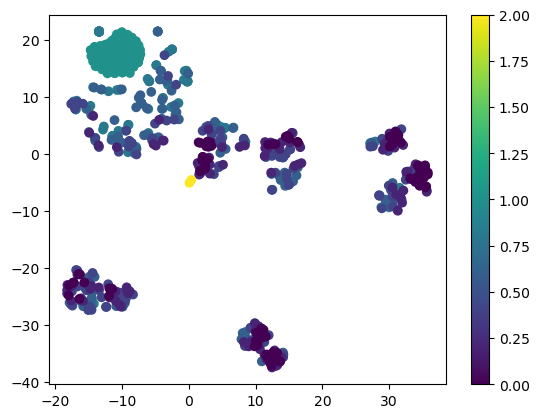

In [182]:
X_2d_art = tsne.fit_transform(artificial_encodings_2)
plt.scatter(X_2d_art[:, 0], X_2d_art[:, 1], c=list(chain.from_iterable([[i] * 100 for i in [1, 0.8, 0.6, 0.4, 0.2, 0]])) + [2, 2], cmap='viridis')
plt.colorbar()
plt.show()

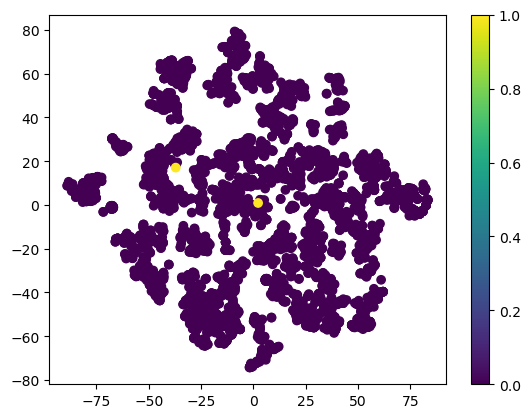

In [184]:
# randomly sample 50000 embeddings
random_sample = embeddings[np.random.randint(0, len(embeddings), 5000)]
# concat other_artificial_encodings and random_sample
artificial_encodings_3 = torch.cat([random_sample, other_artificial_encodings])

# tsne of artificial_encodings_3
X_2d_art_3 = tsne.fit_transform(artificial_encodings_3)
plt.scatter(X_2d_art_3[:, 0], X_2d_art_3[:, 1], c=[0] * 5000 + [1] * 2, cmap='viridis')
plt.colorbar()
plt.show()